# This jupyter notebook is prepared by Tyler Beach.

# A3 LogisticRegression, Multi-layer Perceptron (MLP)

## 1. Load data and perform general EDA (3+2+1+3+6 = 15pts)

### 1.1 import libraries: numpy, matplotlib.pyplot and pandas. (1+1+1 = 3pts)

You can import other libraries below as needed in any block.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1.2 import the data to a pandas dataframe and show the count of rows and columns (2pts)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_name = '/content/drive/My Drive/Wine_Quality_Data.csv'
with open(file_name, 'r') as file:
    df = pd.read_csv(file);

print(str(df.shape[0]) + " rows, " + str(df.shape[1]) + " columns")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
6497 rows, 13 columns


### 1.3 Show if any column has null values. (1pt)

In [ ]:
print("True if there is a null value, false if there is no null value\n")
print(df.isnull().any())

True if there is a null value, false if there is no null value

fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
color                   False
dtype: bool


### 1.4 We will use the 'quality' column as our target label. Print the count of each label in the dataset (in percentage). Mention which quality scores are among top 3 by their counts. (3pts)

In [ ]:
print(df['quality'].value_counts(normalize=True))
print("\nTop 3 most common quality scores are 6, 5, and 7.")

6    0.436509
5    0.329075
7    0.166077
4    0.033246
8    0.029706
3    0.004618
9    0.000770
Name: quality, dtype: float64

Top 3 most common quality scores are 6, 5, and 7.


### 1.5 Observe the correlation matrix for the columns. Name the pairs of columns with highest positive and highest negative correlations. (2+4 = 6pts) 

You can import and use seaborn here to visualize correlation matrix in a heatmap.

The 'color' attribute has strings so I am converting them to 0 and 1 for the heatmap to work. 0 is red and 1 is white.
                      fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000          0.219008     0.324436   
volatile_acidity           0.219008          1.000000    -0.377981   
citric_acid                0.324436         -0.377981     1.000000   
residual_sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free_sulfur_dioxide       -0.282735         -0.352557     0.133126   
total_sulfur_dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743      

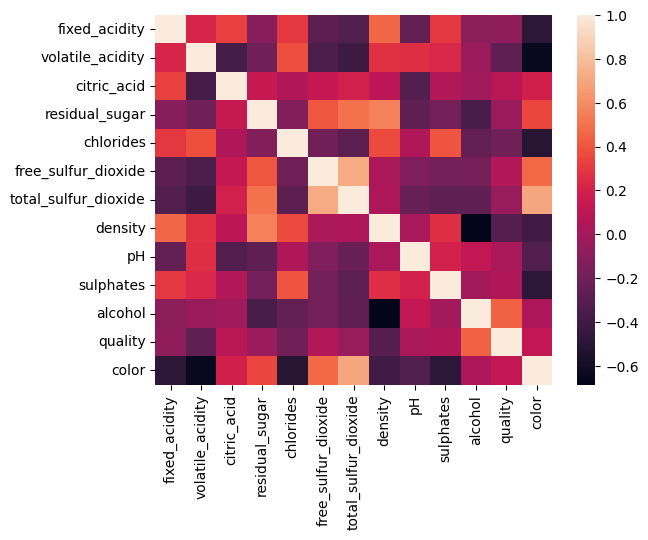

In [ ]:
import seaborn as sns
print("The 'color' attribute has strings so I am converting them to 0 and 1 for the heatmap to work. 0 is red and 1 is white.")

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["color"] = le.fit_transform(df["color"])

corr = df.corr()
sns.heatmap(corr)
print(corr)

print("total_sulfur_dioxide and free_sulfur_dioxide have the highest positive correlation at 0.7209, alcohol and density have the highest negative correlation at -0.6867")

## 2. Feature Selection and Preprocessing (2+2+3+3 = 10pts)

### 2.1 Drop the 'color' attribute from the dataframe. (2pts)

In [ ]:
df.drop(["color"], axis=1, inplace=True)
print(df)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  

### 2.2 Assign the 'quality' column to target label y, and all other columns to attribute matrix X (1+1 = 2pts)

In [ ]:
X = df[["fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", "chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide", "density", "pH", "sulphates", "alcohol"]].copy()
Y = df["quality"].copy()
print(X)
print(Y)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  

### 2.3 Use scikitlearn's Standard Scaler to scale the feature matrix X. (3pts)

In [ ]:
import sklearn.preprocessing as preprocessing

columns = ["fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", "chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide", "density", "pH", "sulphates", "alcohol"]
stdscl = preprocessing.StandardScaler()
X[columns] = stdscl.fit_transform(X[columns])
print(X)
print("We can see that X has how been scaled.")

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0          0.142473          2.188833    -2.192833       -0.744778   0.569958   
1          0.451036          3.282235    -2.192833       -0.597640   1.197975   
2          0.451036          2.553300    -1.917553       -0.660699   1.026697   
3          3.073817         -0.362438     1.661085       -0.744778   0.541412   
4          0.142473          2.188833    -2.192833       -0.744778   0.569958   
...             ...               ...          ...             ...        ...   
6492      -0.783214         -0.787650    -0.197054       -0.807837  -0.486252   
6493      -0.474652         -0.119460     0.284686        0.537425  -0.257883   
6494      -0.551792         -0.605417    -0.885253       -0.891916  -0.429160   
6495      -1.323198         -0.301694    -0.128234       -0.912936  -0.971538   
6496      -0.937495         -0.787650     0.422326       -0.975995  -1.028631   

      free_sulfur_dioxide  

### 2.4 Split Dataset into Training and Test set. (3 pts)
Use 80:20 split for training and test. Also use stratified sampling to ensure balanced dataset.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=69, stratify=Y)

## 3. Logistic Regression from scratch (10+10+10+25+20 = 75pts)


In this section, you will write a logistic regression algorithm from scratch using python and numpy. You will first write some helper functions for transforming label encoding to one-hot encoding, for measuring the cross-entropy loss and predicting labels from test data. These functions will later be used in the logistic regression training and testing.   

### 3.1 The target label in our dataset is the 'quality' column. It consists of categorical values, label-encoded with 7 values in the range [3-9]. To perform a multiclass logistic regression, you need a function that takes a label matrix and converts it to One-hot encoded labels. (10pts)

Write the function below following the docstring. 

In [ ]:
def onehot(y):
    """
    Converts an array of labels to one-hot encoding.

    Parameters:
    -----------
    y : numpy.ndarray
        An array of labels. It must have a shape of (n_samples, ).

    Returns:
    --------
    numpy.ndarray
        A matrix of one-hot encoding. It has a shape of (n_samples, n_classes).
    """
    onehot_labels = np.zeros((y.size, y.max()+1), dtype=int)
    onehot_labels[np.arange(y.size), y] = 1

    return onehot_labels

### 3.2 For multi-class classification, you also need to measure cross-entropy loss. Cross-entropy loss is measured by the following formula:
$\text{Cross-Entropy Loss} = -\frac{1}{N} \sum_{i=1}^N \sum_{j=1}^n y_{ij} \log \hat{y}_{ij}$

Write a function that takes two matrices: one matrix of true labels $y_{ij}$, and one matrix of the predicted labels by your model $\hat{y}_{ij}$ (you are about to write the model function soon below), and returns the computed loss. **(10pts)**


In [ ]:
def cross_entropy_loss(y_true, y_pred):
    """
    Computes the cross-entropy loss between the true labels and predicted labels.

    Parameters
    ----------
    y_true : numpy array
        Array of true labels with shape (m, n_classes).
    y_pred : numpy array
        Array of predicted labels with shape (m, n_classes).

    Returns
    -------
    float
        Cross-entropy loss between y_true and y_pred.

    Notes
    -----
    This function assumes that the labels are one-hot encoded.
    """
    m = y_true.shape[0] # This is N in the summation
    n_classes = y_true.shape[1] # This is n in the summation

    sum = 0;
    for i in range(m):
      for j in range(n_classes):
        sum += y_true[i][j] * np.log(y_pred[i][j])
    
    sum *= (-1 / m)
    return sum

    
    # TODO

### 3.3 Write a function for softmax activation to compute probabilities from the linear score $z_i$. Softmax function uses the following formula:
$$\sigma(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{k}e^{z_j}} , \text{for } i=1,2,3,...,k $$
where $z_i$ is the linear layer score for i-th input.   

**(10pts)**

In [ ]:
def softmax(scores):
    """
    Compute the softmax of the given scores.

    Parameters:
    -----------
    scores : numpy.ndarray
        A 2D numpy array of shape (m, n), where m is the number of samples and n is the number of classes.

    Returns:
    --------
    probs : numpy.ndarray
        A 2D numpy array of shape (m, n) containing the probabilities of each sample belonging to each class.
    """
    e_scores = np.exp(scores)
    sum_e_scores = np.sum(e_scores, axis=1, keepdims=True)
    probs = e_scores / sum_e_scores

    return probs

    #There are K samples.
    #The i-th sample's probability has e^[the ith score] in the numerator
    #The denominator is the sum J from 1 to k of e^[the jth score]



### 3.4 Model development (20+5 = 25pts)

**3.4.1** Write a function for the logistic regression algorithm. You will use the functions you have written above in this module. Recall that with gradient descent optimization, the computation loop goes as:
For each epoch:
1. Compute $scores = X_{train} W + b$ 
2. Compute probability = softmax(scores)
3. Compute Cross-entropy Loss
4. Compute gradients of the loss with respect to the weights and bias.

    Partial derivative of Loss with respect to Weight matrix:
    $$\frac{\partial L}{\partial W} = -\frac{1}{m} X^T \left(y - \hat{y}\right)$$

    Partial derivative of Loss with respect to Bias matrix:
    $$\frac{\partial L}{\partial b_j} = -\frac{1}{m} \sum_{i=1}^m \left(y_{ij} - p_{ij}\right) $$

5. Update the weights and biases
    $$ W = W - (learning\ rate * weight\ gradient)  $$
    $$ b = b - (learning\ rate * weight\ gradient)  $$

**(20pts)**

In [ ]:
def logistic_regression(X_train, y_train, ):
    """
    Performs logistic regression using softmax activation and gradient descent optimizer to classify the input data.

    Parameters:
    -----------
    X_train : numpy.ndarray
        The input training data of shape (num_samples, num_features).
    y_train : numpy.ndarray
        The training labels of shape (num_samples,).

    Returns:
    --------
    W : numpy.ndarray
        The learned weights of shape (num_features, num_classes).
    b : numpy.ndarray
        The learned bias of shape (1, num_classes).
    loss_list : list
        The list of loss values at each epoch during training.
    """

    # get the number of samples and features from X_train (2pts)
    num_samples = X_train.shape[0]
    num_features = X_train.shape[1]
    
    # convert training labels to one-hot encoded labels (2pts)
    y_onehot = onehot(y_train)

    # get the number of target classes from y_train (2pts)
    num_classes = y_onehot.shape[1]

    # initialize the weights and bias with numpy arrays of zeros (1+1 = 2pts)
    W = np.zeros((num_features, num_classes))
    b = np.zeros((1, num_classes))

    # set hyperparameters (1+1 = 2pts)
    ## set a learning rate
    LR = 0.05
    ## set the max number of epochs you want to train for
    epochs = 1000
    
    ## initialize a list to store the loss values (1pt)
    loss_list = []
    
    '''
    Write a for loop over epochs.
    In each epoch:
        compute the score for each class, 
        compute the softmax probabilities, 
        compute the cross-entropy loss, 
        compute the gradients of the loss with respect to the weights and bias, 
        update the weights and bias using the gradients and the learning rate.
    '''
    print("TEST")
    # (9pts)
    for i in range(epochs):
        # compute the score (Z) for each class. 
        Z = np.dot(X_train, W) + b
        
        # calculate the softmax probabilities
        probability = softmax(Z)

        # compute the cross-entropy loss
        loss = cross_entropy_loss(y_onehot, probability)
        loss_list.append(loss)

        # compute the gradients of the loss with respect to the weights and bias
        dw = (1/num_samples) * np.dot(X_train.T, (probability - y_onehot))
        db = (1/num_samples) * np.sum(probability - y_onehot, axis=0, keepdims=True)
        
        # update the weights and bias using the gradients and the learning rate
        W -= LR*dw
        b -= LR*db

        # For tracking progress, print the loss every 100 epochs
        if(i % 100 == 0):
          print("Loss at " + str(i) + " is " + str(loss))

    return W, b, loss_list

**3.4.2** Now that you have the model and the helper function, train the model with your prepared training dataset. Then plot the training loss curve. **(5pts)**

TEST
Loss at 0 is 2.3025850929939637
Loss at 100 is 1.4634916533567854
Loss at 200 is 1.2777718250710863
Loss at 300 is 1.2102516961347594
Loss at 400 is 1.1760420933409583
Loss at 500 is 1.1552143821208172
Loss at 600 is 1.141102482680263
Loss at 700 is 1.1308531421154078
Loss at 800 is 1.1230329699557735
Loss at 900 is 1.1168424033617594


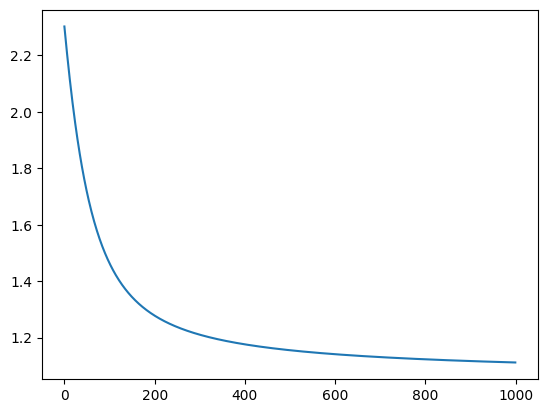

In [ ]:
# train the model
W, b, loss_list = logistic_regression(x_train, y_train)

# plot the loss curve
plt.plot(loss_list)

### 3.5 Evaluation (10+1+4+3+2 = 20pts)

Write a function to predict the labels of X_test using the model trained above and return the predicted labels as categorical values similar to train labels. **(10pts)**

Note: By default, the predicted labels may return values within [0-6] instead of the original labels [3-9]. This can happen due to using argmax() to get label encoding from one-hot encoding when predicting test labels. You can add a simple offset to the argmax outputs of predicted labels to shift them to the range of [3-9]. This is important to note as you may see a very low accuracy even with a good model if true labels and predicted labels are not associated with the same categorical scale. 

In [ ]:
def predict(X_test, W, b):
    '''
    X_test: a numpy array of testing features
    W: a numpy array of weights
    b: a numpy array of bias
    return: a numpy array of one-hot encoded labels
    '''
    # compute the scores
    Z = np.dot(X_test, W) + b

    # compute the probabilities
    probability = softmax(Z)

    # get the predicted labels
    labels = np.argmax(probability, axis=1) 

    # return the predicted labels
    return labels



**3.5.1** import accuracy_score, confusion_matrix, precision_score, recall_score and f1_score from scikitlearn **(1pts)**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

**3.5.2** Print the prediction scores on test data in terms of accuracy, precision and recall score. **(4pts)**

In [ ]:
y_test_pred = predict(x_test, W, b)
print("The accuracy score  is ", accuracy_score(y_test, y_test_pred))
print("The precision score is ", precision_score(y_test, y_test_pred, average='weighted'))
print("The recall score is ", recall_score(y_test, y_test_pred, average='weighted'))

The accuracy score  is  0.536923076923077
The precision score is  0.49832058290940606
The recall score is  0.536923076923077


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**3.5.3** Generate and visualize the confusion matrix. You can use seaborn heatmap to visualize a heatmap of the confusion matrix. **(3pts)**

[Text(0.5, 23.52222222222222, 'Predicted Labels'),
 Text(50.722222222222214, 0.5, 'True Labels')]

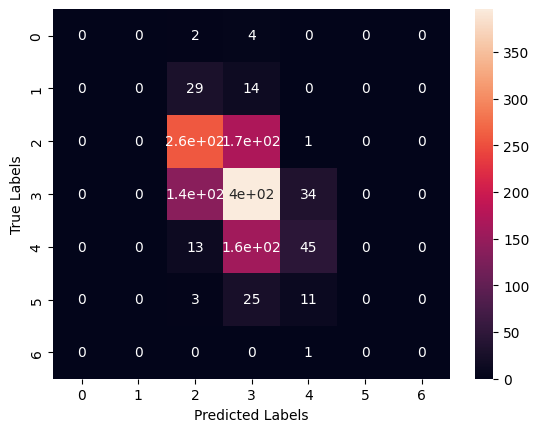

In [ ]:
s = sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True)
s.set(xlabel='Predicted Labels', ylabel='True Labels')

**3.5.4** Which labels seem to be harder to classify for this model? **(2pts)**

It seems to me that it's harder for this model to predict 2's and 4's. There weren't very many true 0's, 1's, 5's, or 6's for the model to even have a chance at correctly identifying, but I noticed that it did tend towards lower predictions for the fewer true 0's and 1's. I don't think there are enough true 0/1/5/6 cases to really even bother analyzing here.

It is also worth noting that while the model does well at correctly identifying true 3's, it often predicts true 2's as 3's and very frequently predicts true 4's as 3's. In fact, for true 4's, an incorrect 3 prediction is more likely than the model correctly predicting 4. In other words, the main issue is it's having some trouble telling a 2 or a 4 from a 3.

###

## 4. Using Scikitlearn Logistic Regression (4+2+7+2 = 15pts)

### 4.1 Import LogisticRegressionCV module and create an instance of it. (4pts)
Use the following parameters:
1. 5-fold crossvalidation, 
2. lbfgs solver, 
3. run for 1000 iterations 
4. use 'multinomial' for choosing softmax classifier  

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(cv=5, solver='lbfgs', max_iter=1000, multi_class='multinomial')

### 4.2 Train the model and predict the labels for test set. (2pts) 

In [ ]:
clf.fit(x_train, y_train)
y_test_pred_LRCV = clf.predict(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


### 4.3 Compute the accuracy, precision, recall and F1 scores. Also visualize the confusion matrix. (1+1+1+1+3 =7pts) 

The accuracy score  is  0.5376923076923077
The precision score is  0.5007148858553967
The recall score is  0.5376923076923077
The F1 score is  0.5065734162992797


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0.5, 23.52222222222222, 'Predicted Labels'),
 Text(50.722222222222214, 0.5, 'True Labels')]

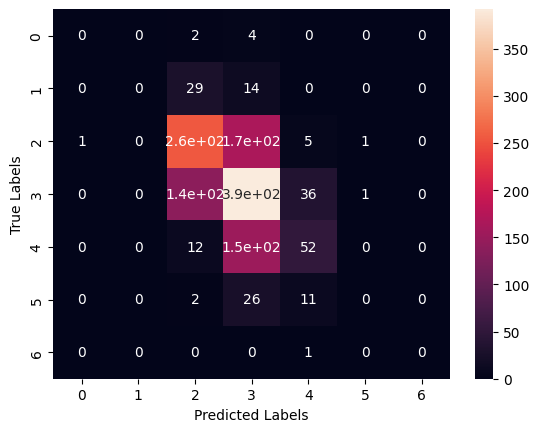

In [ ]:
print("The accuracy score  is ", accuracy_score(y_test, y_test_pred_LRCV))
print("The precision score is ", precision_score(y_test, y_test_pred_LRCV, average='weighted'))
print("The recall score is ", recall_score(y_test, y_test_pred_LRCV, average='weighted'))
print("The F1 score is ", f1_score(y_test, y_test_pred_LRCV, average='weighted'))

s = sns.heatmap(confusion_matrix(y_test, y_test_pred_LRCV), annot=True)
s.set(xlabel='Predicted Labels', ylabel='True Labels')

### 4.4 Did your previous model (built from scratch) and the model from scikitlearn library produced similar evaluation scores? (2pts)

Explain (in <100 words) the similarity and dissimilarity in score. What changed, what didn't, and why?

The scores produced by our own built-from-scratch model and scikitlearn's model were extremely similar. The premade scikitlearn model ("LRCV") had approximately 0.1% higher accuracy, 0.2% higher precision, and 0.1% higher recall. They're all very close to my homemade model. I would guess that, for such small differences, it could be something as simple as the random states, the way the data was split, or even how I coded up my model. I would have to think it's something very minor like that, though, and not an actual issue with how I created my homemade model from scratch.

## 5. Using Scikitlearn Multi-layer Perceptron (16+19 = 35pts)

### 5.1 MLP with one hidden layer and stochastic gradient descent optimizer (4+2+1+7+2 = 16pts)

**5.1.1** Import MLPClassifier from scikitlearn's neural_network library. Then create a model instance of this classifier.

Use the following parameters: 
1. One hidden layer with 100 neurons, 
2. ReLu activation, 
3. Stochastic Gradient Descent solver
4. Learning rate = 0.01 (or you can continue to use your previous learning rate)
5. No of epoch = 1000

Also, set random_state to a fixed value so that your result is reproducible. **(4pts)** 

In [ ]:
from sklearn.neural_network import MLPClassifier

MLP = MLPClassifier(hidden_layer_sizes=(100), activation='relu', solver='sgd', learning_rate = 'constant', learning_rate_init=0.01, max_iter=1000, random_state=28)
# Note that I am using 0.01 for the learning rate this time. In my made-from-scratch model, I did 0.05. This should help create some differences in the scores.

**5.1.2** Train the model with training set.
Then predict the labels for test set. **(2pts)**

In [ ]:
MLP.fit(x_train, y_train)
y_test_pred_MLP = clf.predict(x_test)

**5.1.3** Plot the loss curve **(1pt)**

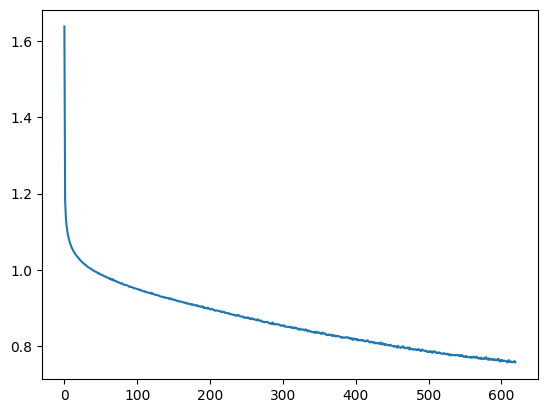

In [ ]:
plt.plot(MLP.loss_curve_)

**5.1.4** Print the accuracy, precision, recall and F1 scores. Also show the confusion matrix. **(1+1+1+1+3 = 7pts)**

The accuracy score  is  0.5376923076923077
The precision score is  0.5007148858553967
The recall score is  0.5376923076923077
The F1 score is  0.5065734162992797


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0.5, 23.52222222222222, 'Predicted Labels'),
 Text(50.722222222222214, 0.5, 'True Labels')]

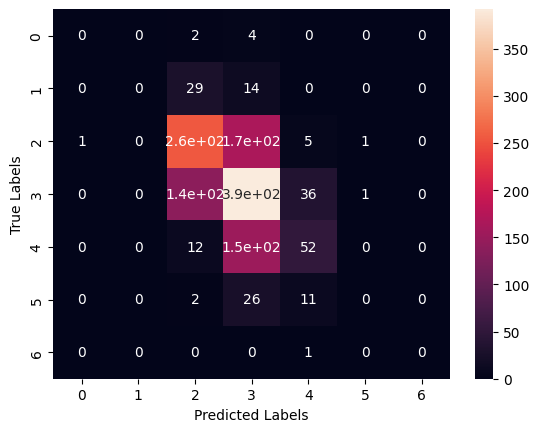

In [ ]:
print("The accuracy score  is ", accuracy_score(y_test, y_test_pred_MLP))
print("The precision score is ", precision_score(y_test, y_test_pred_MLP, average='weighted'))
print("The recall score is ", recall_score(y_test, y_test_pred_MLP, average='weighted'))
print("The F1 score is ", f1_score(y_test, y_test_pred_MLP, average='weighted'))

s = sns.heatmap(confusion_matrix(y_test, y_test_pred_MLP), annot=True)
s.set(xlabel='Predicted Labels', ylabel='True Labels')

**5.1.5** Did you see any change in scores after using the MLP classifier?

In <100 words, describe your observation. **(2pts)**

I saw no change in any of the scores after using the MLP classifier. (I am hoping that the fact you're asking this question means I was supposed to get the same scores, haha)

I was admittedly did not see this coming - I thought for sure using a different model would yield different scores. All of the numbers for the accuracy score, precision score, recall score, and F1 score are exactly the same - and I see no difference between the heatmaps. It appears they made the exact same predictions. This was certainly not what I was expecting!

### 5.2 MLP with two hidden layer and adam optimizer (4+2+1+7+2+3 = 19pts)

**5.2.1** Import MLPClassifier from scikitlearn's neural_network library. Then create a model instance of this classifier.

Use the following parameters: 
1. **Two** hidden layers with 100 neurons, 
2. ReLu activation, 
3. Adam solver (this is an advanced optimizer which we did not cover in class. However the usage is quite straightforward)
4. Learning rate = 0.01 (or you can continue to use your previous learning rate)
5. No of epoch = 1000

Also, set random_state to a fixed value so that your result is reproducible. **(4pts)** 

(Refer to the scikitlearn documentation for clarification on the parameters)

In [ ]:
from sklearn.neural_network import MLPClassifier

MLP2L = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', learning_rate = 'constant', learning_rate_init=0.01, max_iter=1000, random_state=42)
# I guess just nevermind what I said before about different learning rates. We'll see what happens now.

**5.2.2** Train the model with training set.
Then predict the labels for test set. **(2pts)**

In [ ]:
MLP2L.fit(x_train, y_train)
y_test_pred_MLP2L = clf.predict(x_test)

**5.2.3** Plot the loss curve **(1pt)**

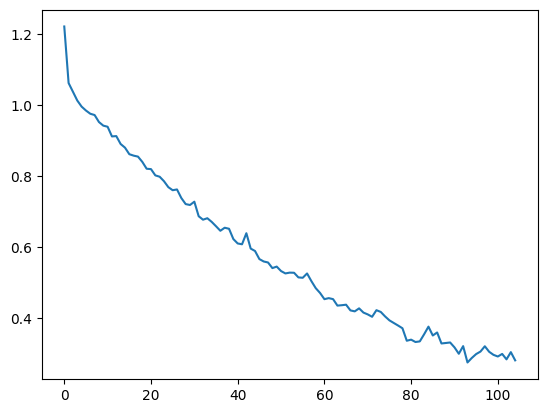

In [ ]:
plt.plot(MLP2L.loss_curve_)

# I notice the curve looks a little more.. erratic than before. I took some time to play with the loss values in the last section and noticed changing the loss value had an effect on how smooth the curve was. Interesting!

**5.2.4** Print the accuracy, precision, recall and F1 scores. Also show the confusion matrix. **(1+1+1+1+3 = 7pts)**

The accuracy score  is  0.5376923076923077
The precision score is  0.5007148858553967
The recall score is  0.5376923076923077
The F1 score is  0.5065734162992797


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0.5, 23.52222222222222, 'Predicted Labels'),
 Text(50.722222222222214, 0.5, 'True Labels')]

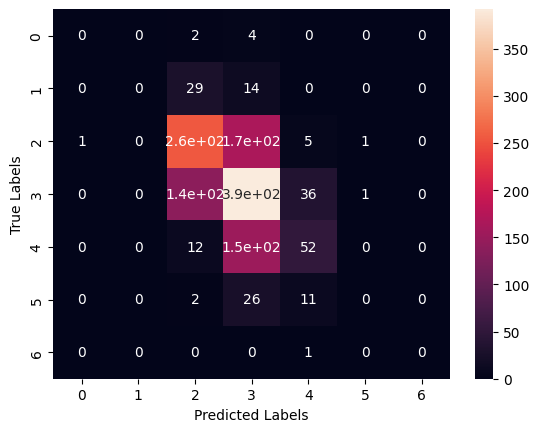

In [ ]:
print("The accuracy score  is ", accuracy_score(y_test, y_test_pred_MLP2L))
print("The precision score is ", precision_score(y_test, y_test_pred_MLP2L, average='weighted'))
print("The recall score is ", recall_score(y_test, y_test_pred_MLP2L, average='weighted'))
print("The F1 score is ", f1_score(y_test, y_test_pred_MLP2L, average='weighted'))

s = sns.heatmap(confusion_matrix(y_test, y_test_pred_MLP2L), annot=True)
s.set(xlabel='Predicted Labels', ylabel='True Labels')

**5.2.5** Describe any difference in the loss curve from MLP with one hidden layer and MLP with two hidden layer. **(2pts)**

As I noted in the section where I plotted the loss curve for MLP with two hidden layers, this time the loss curve was noticeably more "erratic" - it wasn't a smooth descent like the first two were. For fun, I did tinker with the learning rates on the LRCV and first MLP models and found that I could make graph more or less erratic (I could make the downward curve more or less smooth) just by changing the learning rate. Interesting!

**5.2.6** Did you see any change in scores between the two MLP models?

In <100 words, describe your observation. **(3pts)**

I'm not entirely sure if I was _supposed_ to see a change in scores between the two models, but to answer the question directly: no, I did not. This was surprising to me, but I found that the premade logistic regression model (as well as both versions of MLP) all had the same scores - and all of those scores were themselves very similar to that of my homemade model! I wrote a comment back in 5.1.1 explaining how I thought changing the learning rate might get some different scores. Little did I know, they would all be the same. 